# Lab 3
### Convolution, Blurring, Denoising, and Edge Detection

#### 1. libraries and dependencies

In [13]:
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;

#### 2. Load a sample image and scale the image half of its size

In [12]:
img = cv2.imread('./money.JPG')

img_half = cv2.resize(img,(img.shape[1] // 2, img.shape[0] //  2))


#### 3. Convolution
- Apply this kernel on your image.

         [1, 0, -1],
         [1, 0, -1],
         [1, 0, -1] 

- Use matplotlib to show your original and convolved images side by side.
- Describe the observed effect of the convolution operation. What features does this kernel highlight?

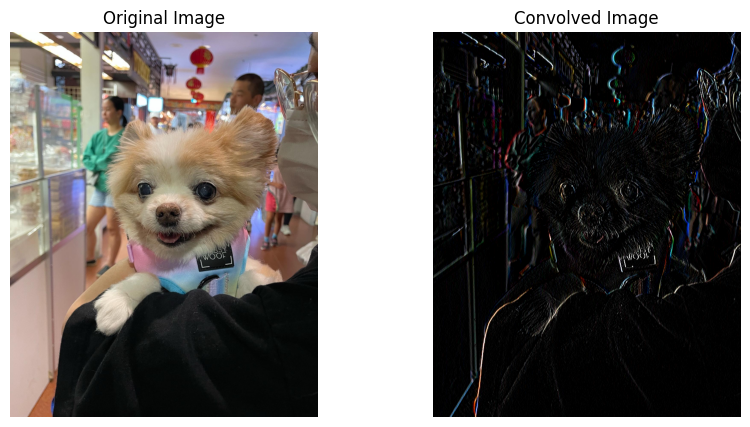

In [15]:
#define a kernel for edge detection
kernel =  np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])
# apply the filter2D function
convolved = cv2.filter2D(img_half, -1, kernel)

#convert the image to rgb for matplotlib
img_half_rgb = cv2.cvtColor(img_half, cv2.COLOR_BGR2RGB)
convolved_rgb = cv2.cvtColor(convolved, cv2.COLOR_BGR2RGB)

#show the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_half_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(convolved_rgb)
plt.title('Convolved Image')
plt.axis('off')
plt.show()

#### 4. Blur
- Apply Gaussian blur and average blur to the image.
- Show images side by side using OpenCV this time.

In [ ]:
#apply gaussian blur and normal blur
guassian_blurred = cv2.GaussianBlur(img_half, (7, 7), 0)
normal_blurred = cv2.blur(img_half, (7, 7))

#show both images side by side
combined = np.hstack((guassian_blurred, normal_blurred))
cv2.imshow('Combined', combined)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### 5. Denoising
- Add noise to your image.
- Apply median filtering to denoise an image.

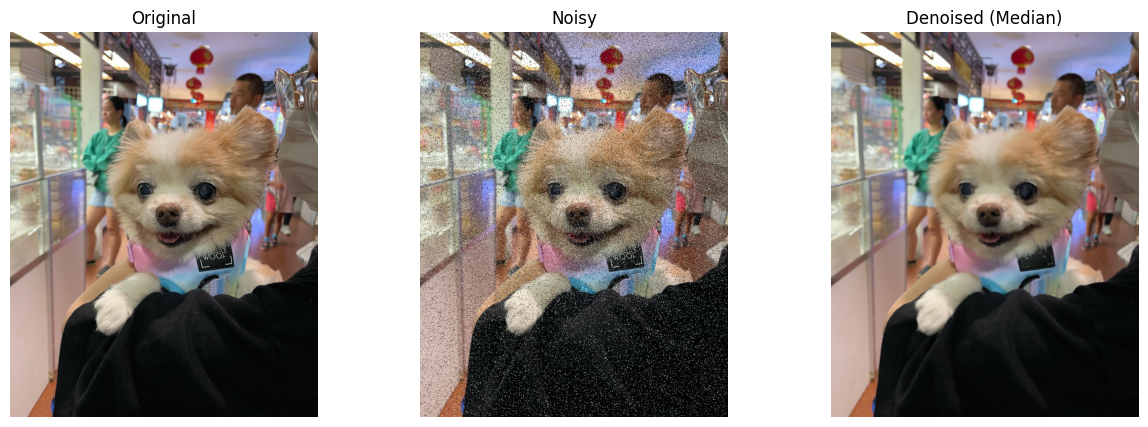

In [17]:
# add salt-and-pepper noise 
noisy_img = img_half.copy()
amount = 0.03
num_salt = np.ceil(amount * img_half.size * 0.5)
num_pepper = np.ceil(amount * img_half.size * 0.5)

# salt noise
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img_half.shape[:2]]
noisy_img[coords[0], coords[1], :] = 255

# pepper noise
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img_half.shape[:2]]
noisy_img[coords[0], coords[1], :] = 0

# apply median filtering
denoised_img = cv2.medianBlur(noisy_img, 5)

# show results using matplotlib
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img_half, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Noisy')
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Denoised (Median)')
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

#### 6. Edge Detection
Apply any one of the edge detection algorithms you are familiar with.

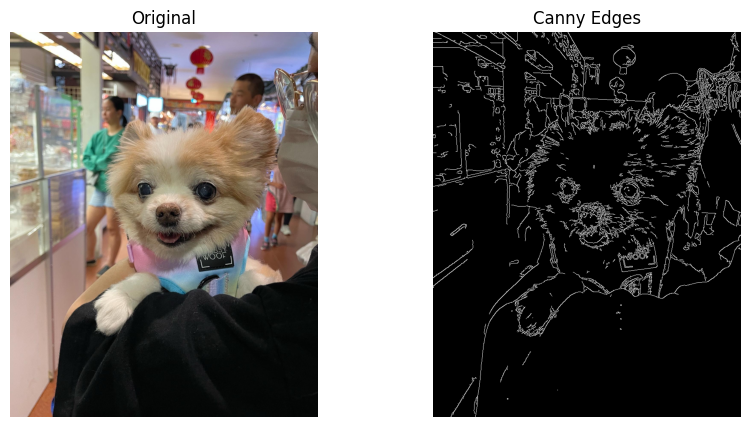

In [18]:
# apply canny edge detection to the half-sized image
edges = cv2.Canny(img_half, 100, 200)

# display the original and edge-detected images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img_half, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

##### Great job!